# Market implied price surfaces: v1

What combination of varibles does a current price imply?

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import xlwings as xw
from tqdm import tqdm
import dtale

plt.rcParams["figure.figsize"] = (15, 10)
plt.style.use("seaborn-deep")

In [15]:
wb = xw.Book('data/SPValueCorona.xlsx')
sht = wb.sheets["Valuing the Index"]

In [36]:
curr_level_cell = sht.range("C4")
cash_ret_cell = sht.range("C6")
earn_drop_cell = sht.range("C7")
earn_growth_cell = sht.range("C8")
risk_free_cell = sht.range("C9")

value_cell = sht.range("C16")

In [19]:
# Set inputs
risk_free_cell.value = 0.015
curr_level_cell.value = 2475.56

In [31]:
earn_growth.value = 0.048

In [37]:
# Partial derivatives
# Three variables that probably matter:
cash_ret_init = cash_ret_cell.value
earn_drop_init = earn_drop_cell.value
earn_growth_init = earn_growth_cell.value

In [72]:
# to reset
cash_ret_cell.value = cash_ret_init 
earn_drop_cell.value = earn_drop_init
earn_growth_cell.value = earn_growth_init

In [76]:
# Value vs earnings drop
earn_drop_range = np.linspace(-0.5, 0, 50)
values_earn_drop = []
for drop in tqdm(earn_drop_range):
    earn_drop_cell.value = drop
    values_earn_drop.append(value_cell.value)

earn_drop_cell.value = earn_drop_init

100%|██████████| 50/50 [00:12<00:00,  4.26it/s]


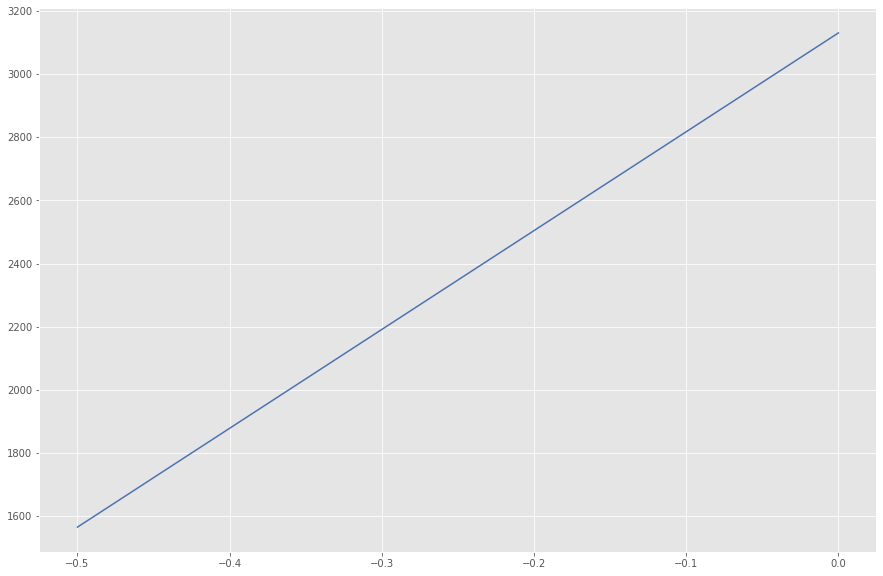

In [78]:
plt.plot(earn_drop_range, values_earn_drop)

In [79]:
# Change per % drop in earnings
grad_earn_drop = np.polyfit(earn_drop_range, np.array(values_earn_drop), 1)[0]/100
print(grad_earn_drop)

31.307530222232746


In [80]:
# Value vs y2-5 growth
earn_growth_range = np.linspace(0, 0.05, 50)
values_earn_growth = []
for growth in tqdm(earn_growth_range):
    earn_growth_cell.value = growth
    values_earn_growth.append(value_cell.value)

100%|██████████| 50/50 [00:14<00:00,  4.24it/s]


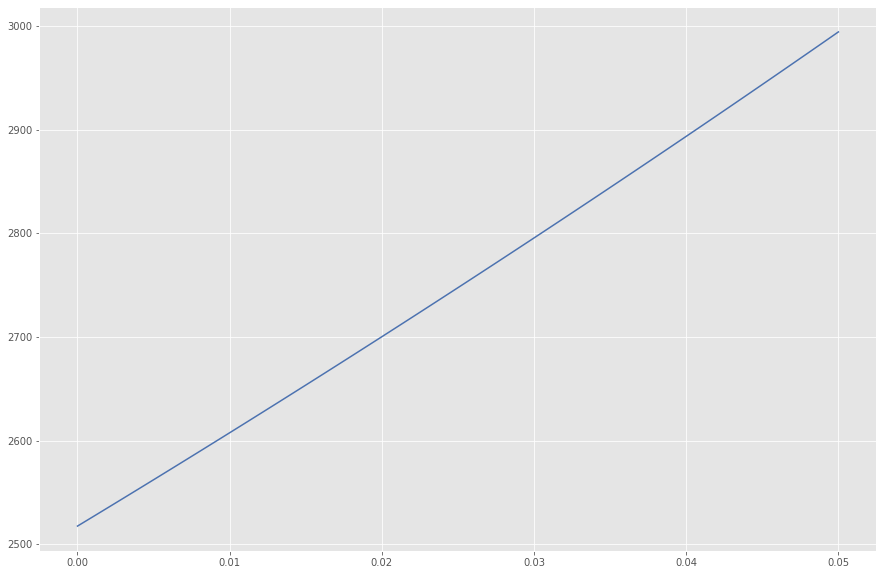

In [81]:
plt.plot(earn_growth_range, values_earn_growth)

In [82]:
grad = np.polyfit(earn_growth_range, np.array(values_earn_growth), 1)[0]/100
print(grad)

95.40790403268284


In [220]:
# Generate data
wb.app.calculation = "manual"
results = []
n_res = 50
counter = 0
for drop in np.linspace(-0.5, 0, n_res):
    counter +=1 
    if counter % 5 == 0:
        print(".")
    for growth in (np.linspace(0, 0.25, n_res)):
        earn_growth_cell.value = growth
        earn_drop_cell.value = drop
        wb.app.calculate()
        results.append([growth, drop, value_cell.value])
print("Done")

.
.
.
.
.
.
.
.
.
.


In [222]:
df = pd.DataFrame(results, columns=["earn_growth", "earn_drop", "value"])
df.head()

,earn_growth,earn_drop,value
0,0.000000,-0.5,1324.982229
1,0.005102,-0.5,1349.012583
2,0.010204,-0.5,1373.396157
3,0.015306,-0.5,1398.136470
4,0.020408,-0.5,1423.237059


In [317]:
df.to_csv("excel/mc_value_vs_growth_drop.csv", index=None)

In [223]:
mesh = pd.pivot_table(df, values="value", index="earn_drop", columns="earn_growth")
mesh.head()

earn_growth,0.000000,0.005102,0.010204,0.015306,0.020408,0.025510,0.030612,0.035714,0.040816,0.045918,...,0.204082,0.209184,0.214286,0.219388,0.224490,0.229592,0.234694,0.239796,0.244898,0.250000
earn_drop,,,,,,,,,,,,,,,,,,,,,
-0.500000,1324.982229,1349.012583,1373.396157,1398.136470,1423.237059,1448.701477,1474.533296,1500.736105,1527.313511,1554.269139,...,2598.081618,2639.159247,2680.744570,2722.841809,2765.455203,2808.589010,2852.247506,2896.434984,2941.155752,2986.414141
-0.489796,1352.022683,1376.543452,1401.424650,1426.669867,1452.282713,1478.266813,1504.625812,1531.363372,1558.483175,1585.988917,...,2651.103691,2693.019640,2735.453643,2778.410009,2821.893064,2865.907154,2910.456639,2955.545902,3001.179339,3047.361368
-0.479592,1379.063137,1404.074321,1429.453143,1455.203265,1481.328367,1507.832149,1534.718328,1561.990640,1589.652838,1617.708695,...,2704.125765,2746.880033,2790.162716,2833.978209,2878.330926,2923.225297,2968.665772,3014.656820,3061.202926,3108.308596
-0.469388,1406.103590,1431.605190,1457.481636,1483.736662,1510.374021,1537.397485,1564.810844,1592.617907,1620.822502,1649.428474,...,2757.147839,2800.740426,2844.871789,2889.546409,2934.768787,2980.543440,3026.874905,3073.767738,3121.226513,3169.255823
-0.459184,1433.144044,1459.136059,1485.510129,1512.270060,1539.419676,1566.962822,1594.903361,1623.245175,1651.992165,1681.148252,...,2810.169913,2854.600818,2899.580862,2945.114609,2991.206648,3037.861583,3085.084038,3132.878656,3181.250100,3230.203050


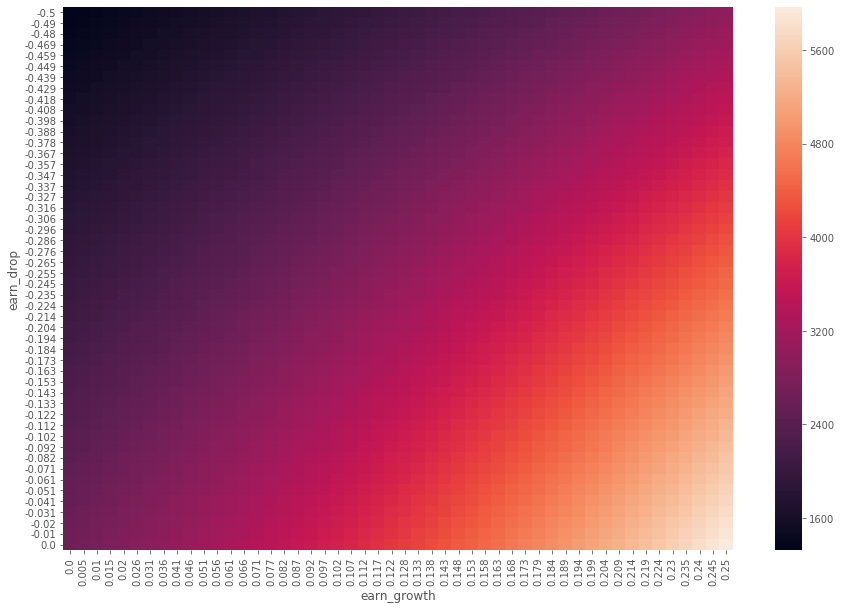

In [236]:
plt.figure(facecolor="w")
sns.heatmap(data=mesh,
            xticklabels=mesh.columns.values.round(3),
            yticklabels=mesh.index.values.round(3))

In [231]:
# Get projection line
# currprice = mesh[(mesh < 2500) & (mesh > 2450)]
# currprice
# price_implied_drops = []
# for col in currprice.columns:
#     try:
#         price_implied_drops.append(currprice.index[currprice[col].notnull()].values.mean())
#     except:
#         price_implied_drops.append(price_implied_drops[-1])

<IPython.core.display.Javascript object>


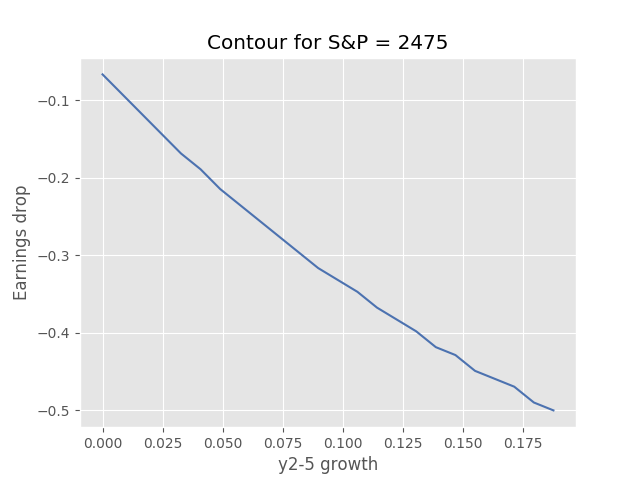

In [209]:
plt.figure()
plt.plot(currprice.columns.values, np.array(price_implied_drops))
plt.xlabel("y2-5 growth")
plt.ylabel("Earnings drop")
plt.title("Contour for S&P = 2475")
plt.show()

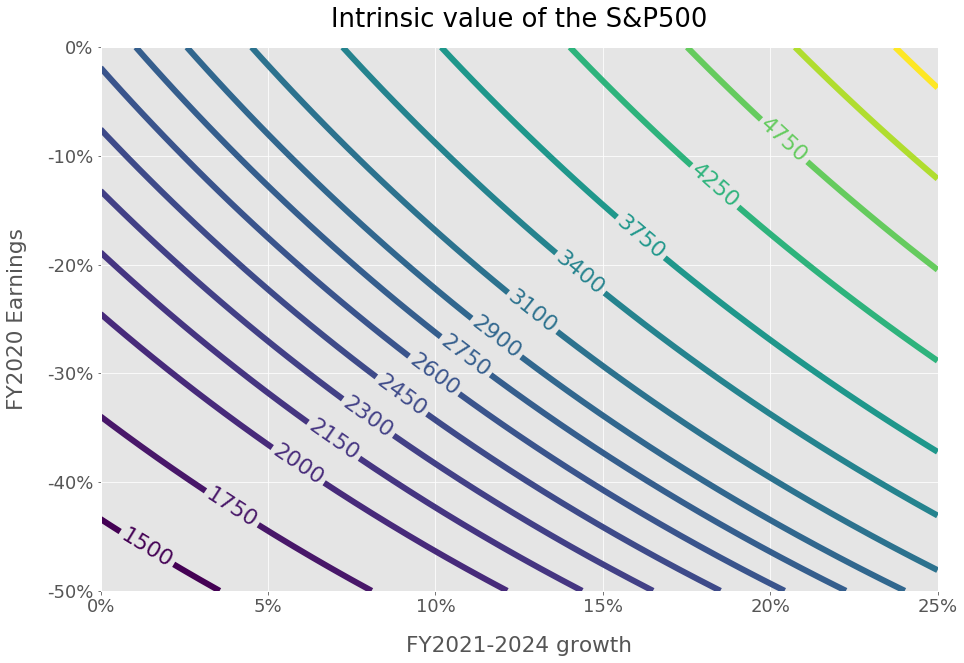

In [315]:
plt.rcParams.update({'font.size': 18})

fig, ax = plt.subplots(facecolor="w")
# levels = list(range(1500, 2301, 250)) + list(range(2350, 2551, 50)) + list(range(2600, 4501, 500))
levels = [1500, 1750] + list(range(2000, 3000, 150)) + [3100, 3400] + list(range(3750, 6000, 500))
CS = ax.contour(mesh.columns, mesh.index, mesh.values.round(2), levels=levels, linewidths=6)

clabel_pos = []
for x in [0.01, 0.2, 0.04, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.16, 0.18]:
    clabel_pos.append((x, 2*x -0.5))

plt.clabel(CS,fmt="%1.0f", fontsize=22, manual=clabel_pos)
ax.set_ylabel("FY2020 Earnings", labelpad=20)
ax.set_xlabel("FY2021-2024 growth", labelpad=20)
ax.set_yticklabels([f"{100*y:.0f}%" for y in ax.get_yticks()])
ax.set_xticklabels([f"{100*x:.0f}%" for x in ax.get_xticks()])
ax.set_title("Intrinsic value of the S&P500", pad=20)

plt.savefig("spy_earnings_growth_contour.png", bbox_inches='tight', dpi=600)
plt.show()

<IPython.core.display.Javascript object>


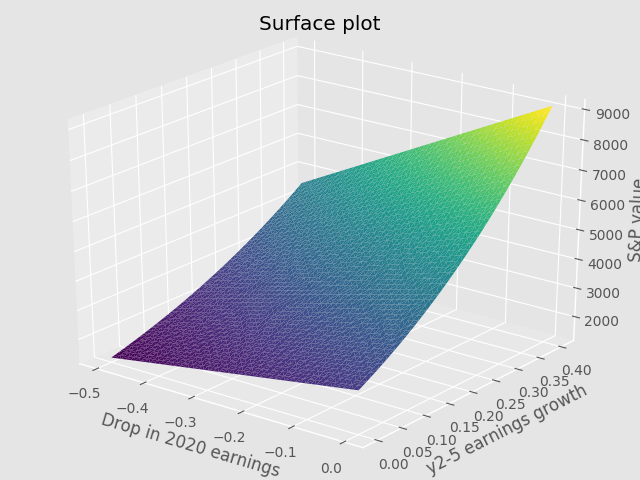

In [210]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
# ax.trisurf(mesh.index, mesh.columns, mesh.values)
ax.plot_trisurf(df.earn_drop, df.earn_growth, df.value, cmap="viridis")
ax.set_title('Surface plot')
ax.set_xlabel('Drop in 2020 earnings')
ax.set_ylabel('y2-5 earnings growth')
ax.set_zlabel('S&P value')
plt.show()

## Contours

What combinations of earnings growth and drop explain the current market price? This is represented by a contour in drop/growth space. 